# Week1 - Predictive Analytics project
## K Nearest Neighbour on Las Vegas Trip advisor dataset
### Chetan Kulkarni



Goal of this project is to predict the Hotel score based on the number of reviews, useful reviews, hotel stars. 

Data extraction : Data is Las Vegas Trip Advisor Dataset extracted from Kaggle/UCI data.

Describe the dataset : This dataset includes quantitative and categorical features from online reviews from 21 hotels located in Las Vegas Strip, extracted from TripAdvisor
 
### Description of each data attribute from dataset 
User Country : Home country of the user who posted the review on TripAdvisor

No of Reviews: Total number of all reviews posted by the user on TripAdvisor

No of ReviewNum : Total number of all reviews the hotel being reviewed has received on TripAdvisor

HelpfulVotes : Total number of votes by other users considering the user’s review helpful

Score : User’s rating of the hotel by the user on the scale of 1 to 5, with 5 being the best rating possible.

Stay Period: Period of time in which the user stayed at the hotel being reviewed

Traveler type: Type of user who posted the review (business, couples, families, friends, solo)

Pool: Does the hotel has a pool? (YES/NO)

Gym: Does the hotel has a gym? (YES/NO)

Tennis: Does the hotel has a tennis court? (YES/NO)

Spa: Does the hotel has a spa? (YES/NO)

Casino: Does the hotel has a casino? (YES/NO)

Internet: Does the hotel provide free Internet? (YES/NO)

Hotel Name: Name of the hotel being reviewed

Stars: Hotel external rating (1 through 5 stars, with 5 being the best possible)

Capacity: Total number of rooms in the hotel being reviewed

Continent: Home continent of the user who posted the review on TripAdvisor

Length: Length of time the user who posted the review has been a member of TripAdvisor community

Review Month: The month (January through December) in which the user posted the review on TripAdvisor

Review Day: The day of the week (Sunday through Saturday) on which the user posted the review on TripAdvisor

Description of each data attribute created as part of data wrangling process

Average Rating: Average guest ratings

Facility Score: Total number of amenities offered by the hotel being reviewed (sum of “Pool”, “Gym”, “Tennis”, “Spa”, “Casino”, “FreeInternet”)

ReviewsReceived : Total number of reviews recevied by the hotel being reviewed (sum of “HReviewNum”)




Import all the libraries


In [4]:
from IPython.display import display 
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import neighbors, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

### Data extraction

Read the values in excel in vegas dataframe and print the type of vegas
<br>

In [6]:
#Read the values from Excel
vegas = pd.read_csv("lasvegas_tripadvisor.csv")
vegas.head(5)

FileNotFoundError: File b'lasvegas_tripadvisor.csv' does not exist

### Data cleanup
Renaming the column names for convinience

In [546]:
vegas.columns = ['User_country', 'Nr_reviews', 'Nr_hotel_reviews', 'Helpful_votes',
       'Score', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'Hotel_stars', 'Nr_rooms', 'User_continent', 'Member_years',
       'Review_month', 'Review_weekday']
vegas.columns

Index(['User_country', 'Nr_reviews', 'Nr_hotel_reviews', 'Helpful_votes',
       'Score', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'Hotel_stars', 'Nr_rooms', 'User_continent', 'Member_years',
       'Review_month', 'Review_weekday'],
      dtype='object')



Check for NA values in the given dataset cleaning up columns
Using isna().sum() we can see that there are no NA values in the columns


In [547]:
vegas.isna().sum()

User_country        0
Nr_reviews          0
Nr_hotel_reviews    0
Helpful_votes       0
Score               0
Period_of_stay      0
Traveler_type       0
Pool                0
Gym                 0
Tennis_court        0
Spa                 0
Casino              0
Free_internet       0
Hotel_name          0
Hotel_stars         0
Nr_rooms            0
User_continent      0
Member_years        0
Review_month        0
Review_weekday      0
dtype: int64

Describe the Dataset using describe function

The describe function below gives output for the minimum value of member years as -1806.000000, it is outlier and needs to be cleaned up

In [548]:
vegas.describe()

,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Hotel_stars,Nr_rooms,Member_years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,0.844650,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


Drop/Delete the rows in Member_years that have negative values

In [549]:
df = vegas[vegas['Member_years']< 0].index.values.astype(int)[0]
vegas.drop(df, axis =0, inplace = True)
vegas.describe()

,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Hotel_stars,Nr_rooms,Member_years
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,48.192843,16.037773,31.783300,4.121272,4.047714,2195.013917,4.359841
std,75.058202,23.979751,48.563988,1.007544,0.845488,1286.389759,2.928725
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,0.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,24.000000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.500000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


Check the value count of each columns

In [550]:
vegas.User_country.value_counts(dropna = False)
#vegas

USA                     216
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
New Zeland                5
Egypt                     5
Brazil                    5
Singapore                 4
Netherlands               4
Norway                    3
Malaysia                  3
Israel                    3
Thailand                  3
Finland                   3
Hawaii                    3
Spain                     2
Scotland                  2
Switzerland               2
Costa Rica                2
United Arab Emirates      2
South Africa              1
Kuwait                    1
Swiss                     1
Syria                     1
Puerto Rico               1
Hungary                   1
Italy                     1
Korea                     1
Denmark                   1
Iran                      1
Phillippines              1
Saudi Arabia        

In [551]:
vegas.dtypes

User_country        object
Nr_reviews           int64
Nr_hotel_reviews     int64
Helpful_votes        int64
Score                int64
Period_of_stay      object
Traveler_type       object
Pool                object
Gym                 object
Tennis_court        object
Spa                 object
Casino              object
Free_internet       object
Hotel_name          object
Hotel_stars          int64
Nr_rooms             int64
User_continent      object
Member_years         int64
Review_month        object
Review_weekday      object
dtype: object

## Data Visualizations

In [1]:
count_Class=pd.value_counts(vegas["score"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

NameError: name 'pd' is not defined

Text(0, 0.5, 'Score Frequency')

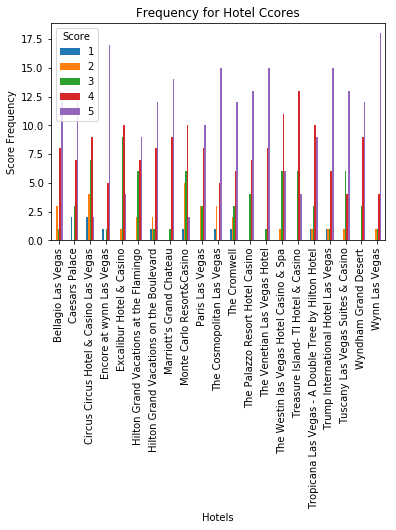

In [552]:
#Bar Plot
%matplotlib inline
pd.crosstab(vegas.Hotel_name,vegas.Score).plot(kind='bar')
plt.title('Frequency for Hotel Ccores')
plt.xlabel('Hotels')
plt.ylabel('Score Frequency')

The Bar graph from above suggest that guests rating seems to be biased. Guests are satisfied with most hotels, as the  majority of ratings are towards the top rating of 4, 5 as shown in red and purple line.


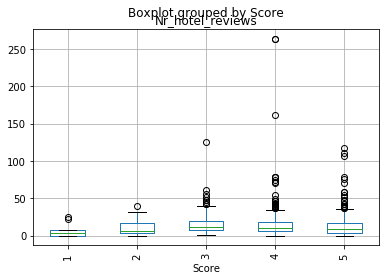

In [553]:
#Boxplot for member years
vegas.boxplot(column='Nr_hotel_reviews', by='Score', rot=90)
plt.show()

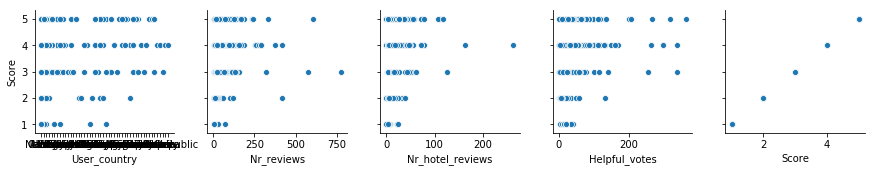

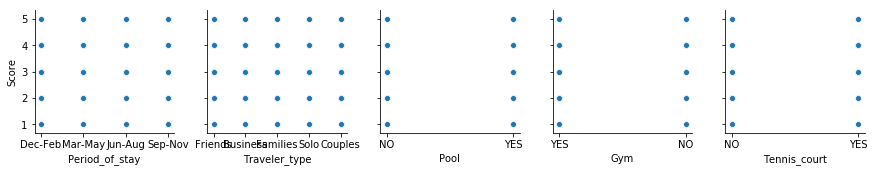

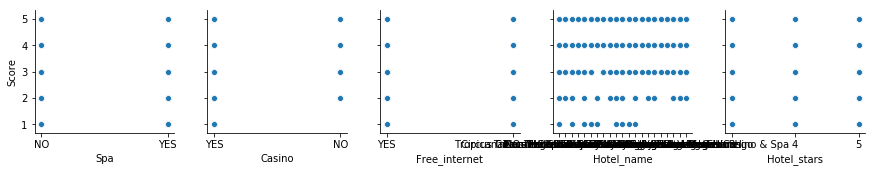

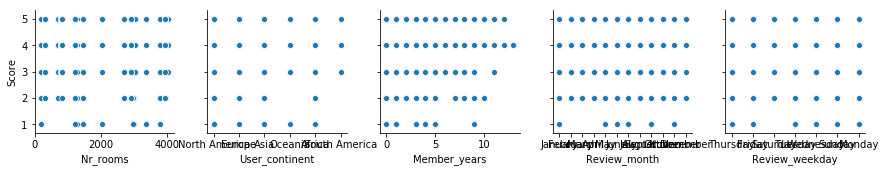

In [554]:
for i in range(0, len(vegas.columns),5):
    sns.pairplot(vegas, y_vars = 'Score', x_vars = vegas.columns[i:i+5])

The Correlation heatmap and correlation we can analyse that there are no correlation between the variables. Hence we have to use multiple variables for Modeling.

,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Hotel_stars,Nr_rooms,Member_years
Nr_reviews,1.000000,0.655006,0.790646,-0.023622,-0.071714,-0.136200,0.117751
Nr_hotel_reviews,0.655006,1.000000,0.764278,0.014239,-0.109051,-0.128631,0.292923
Helpful_votes,0.790646,0.764278,1.000000,0.016049,-0.037104,-0.098840,0.269738
Score,-0.023622,0.014239,0.016049,1.000000,0.156884,-0.081212,0.072942
Hotel_stars,-0.071714,-0.109051,-0.037104,0.156884,1.000000,0.421151,0.034080
Nr_rooms,-0.136200,-0.128631,-0.098840,-0.081212,0.421151,1.000000,-0.017445
Member_years,0.117751,0.292923,0.269738,0.072942,0.034080,-0.017445,1.000000


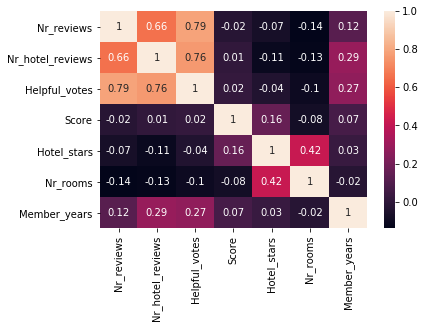

In [555]:
correlation_matrix = vegas.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

vegas.corr()

Change the varibles from strings to integers, this can be done in 2 ways 
1) Get Dummies
2) Change the values to binary, in our case since many values are yes and no, we are chnaging them to 0, 1

In [556]:
def changeyesno(x):
    if x=="YES":
        return 1
    else:
        return 0
    
def changestr(str):
    x=0
    for l in str:
        x += ord(l)
    return int(x)

vegas['Casino']=vegas['Casino'].apply(lambda x : changeyesno(x))
vegas['Gym']=vegas['Gym'].apply(lambda x : changeyesno(x))
vegas['Pool']=vegas['Pool'].apply(lambda x : changeyesno(x))
vegas['Tennis_court']=vegas['Tennis_court'].apply(lambda x : changeyesno(x))
vegas['Casino']=vegas['Casino'].apply(lambda x : changeyesno(x))
vegas['Free_internet']=vegas['Free_internet'].apply(lambda x : changeyesno(x))
vegas['Spa']=vegas['Spa'].apply(lambda x : changeyesno(x))


Str_columns = ['Period_of_stay', 'Hotel_name', 'User_country',
         'Traveler_type', 'User_continent', 'Review_month', 'Review_weekday']

for y in Str_columns:
    vegas[y]=vegas[y].apply(lambda x: changestr(x))

In [557]:
vegas.head()

,User_country,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,Hotel_stars,Nr_rooms,User_continent,Member_years,Review_month,Review_weekday
0,233,11,4,13,5,582,715,0,1,0,0,0,1,3367,3,3773,1245,9,730,852
1,233,119,21,75,3,582,844,0,1,0,0,0,1,3367,3,3773,1245,3,730,607
2,233,36,9,25,5,628,810,0,1,0,0,0,1,3367,3,3773,1245,2,832,845
3,160,14,7,14,4,628,715,0,1,0,0,0,1,3367,3,3773,624,6,832,607
4,568,5,5,2,4,628,413,0,1,0,0,0,1,3367,3,3773,1245,7,491,735


In [558]:
new_df = pd.DataFrame(vegas,columns=vegas.columns)

In [559]:
new_df.drop(['Free_internet','Nr_hotel_reviews','Period_of_stay','Nr_reviews','User_country','Traveler_type','Pool','Gym','Tennis_court','Spa','Casino','Nr_rooms','User_continent','Review_month','Review_weekday'],axis=1, inplace=True)

## Predictive Model (Classification) - K Nearest Neighbour
Goal is to predict score based on the variables like Helpful_votes, Hotel_stars, Period_of_stay etc. KNN helps to build the model using the training set, and then check the accuracy using the testing set.

How to Prepare Data for KNN

1) Rescale Data : KNN performs much better if all of the data has the same scale. Normalizing your data to the range [0, 1] is a good idea. It may also be a good idea to standardize your data if it has a Gaussian distribution.

2) Address Missing Data (performed above) : Missing data will mean that the distance between samples can not be calculated. These samples could be excluded or the missing values could be imputed.

3) SMOTE - Synthetic Minority Over-sampling Technique :  This technique removes imbalance in data by oversampling data by creating synthethic variations in the data. Thus helping us to balance our skewed dataset while not biasing the model.

### Load Features and Targets
Now we will create the input features X and output feature Y from the dataset

In [602]:
X = vegas.drop('Score',axis=1)
y = vegas['Score']

### Split Train and Test Sets
We performed a Test-train split. Splitting our training and test data into a 60-40 (Train-Test) ratio.

In [603]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40)

### SMOTE - Synthetic Minority Over-sampling Technique

Since we are dealing with imbalanced data all the ratings are skewed towards 4,5 ratings. We performed SMOTE(Synthetic Minority Over-sampling Technique) on our data. This technique removes imbalance in data by oversampling data by creating synthethic variations in the data. Thus helping us to balance our skewed dataset while not biasing the model.

In [604]:
# Using SMOTE to balance the train data we have
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train,np.array(y_train).ravel())

### Transform Feature Values
As mentioned above we need to Rescale Data using StandardScaler

In [605]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### Fit Model

In [606]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Predict Metric - Testing our models

Using the optimized hyper parameters learnt from cross validation we tested our models using the test data. The evaluation metrics used were confusion matrix, accuracy and f1-score.

A) Confusion matrix: It computes the accuracy of a classification. It counts true negatives, false negatives, true positives, and false positives.

B) Accuracy: It determines how well the model performs based on true and predicted labels.

A) F-1 score: It computes the weighted average of precision and recall. A score closer to 1 is considered as good and 0 as bad.


In [607]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)   
print("Mean value is :",np.mean(y_pred != y_test))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Mean value is : 0.6831683168316832


[[ 1  0  1  1  0]
 [ 1  1  5  3  0]
 [ 2  6 10 10  2]
 [ 7 11 16 19 10]
 [ 8 15 16 24 33]]


              precision    recall  f1-score   support

           1       0.05      0.33      0.09         3
           2       0.03      0.10      0.05        10
           3       0.21      0.33      0.26        30
           4       0.33      0.30      0.32        63
           5       0.73      0.34      0.47        96

   micro avg       0.32      0.32      0.32       202
   macro avg       0.27      0.28      0.24       202
weighted avg       0.49      0.32      0.36       202



### Finding the Optimal K
Before Fitting the Model, we have to check the optimal value for K, we can do this by using crossvalidation approach.

In [608]:
kval = [1, 5, 8, 10, 13, 18, 20]
scores = []
# running for different K values to know which yields the max accuracy. 
for i in kval:   
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    scores.append(score.mean())
mse = [1-x for x in scores]

### Plot Result

Text(0, 0.5, 'Mean Error')

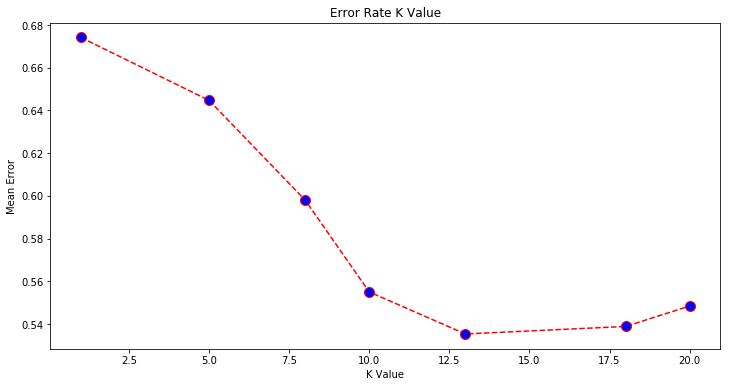

In [587]:
plt.figure(figsize=(12, 6))  
plt.plot(kval, mse, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

The plot shows the test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 13 neighbors.

The above plot suggests that we should choose n_neighbors=13.

### Now Fit the Optimal K equals 5 

In [609]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Predict Metric

In [610]:
y_pred = classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.05      0.33      0.09         3
           2       0.03      0.10      0.05        10
           3       0.21      0.33      0.26        30
           4       0.33      0.30      0.32        63
           5       0.73      0.34      0.47        96

   micro avg       0.32      0.32      0.32       202
   macro avg       0.27      0.28      0.24       202
weighted avg       0.49      0.32      0.36       202



F-1 score: It computes the weighted average of precision and recall. A score closer to 1 is considered as good and 0 as bad. Here the f1-score is 47%

### Confusion Matrix for Optimal K

In [611]:
print(confusion_matrix(y_test, y_pred))

[[ 1  0  1  1  0]
 [ 1  1  5  3  0]
 [ 2  6 10 10  2]
 [ 7 11 16 19 10]
 [ 8 15 16 24 33]]


Seeing the above diagram we can say

True Positives (TP): We tested for Positive (Will Have) & they actual have the correct ratings.

True Negatives (TN): We tested for Negative (Will Not Have) & they actual don’t have the correct ratings.

False Positives (FP): We tested for Positive (Will Have) & they actual don’t have correct ratings. (Also known as a “Type I error.”)

False Negatives (FN): We tested for Negative (Will Not Have) & they actual have the correct ratings. (Also known as a “Type II error.”)

As shown below, for K  = 5, the confusion matrix has true positives and False positives as 65 and 32 respectively that means it has predicted 65 times correctly that rating of the hotels from 
True Positives in total are 65 that is the number of time they have correct ratings 
1 - 1 
2 - 1 
3 - 10 
4 - 19
5 - 33


#### For K = 13

In [615]:
classifier = KNeighborsClassifier(n_neighbors=13)  
classifier.fit(X_train, y_train) 
print(confusion_matrix(y_test, y_pred))
y_pred = classifier.predict(X_test)  
print('\n')
print(classification_report(y_test, y_pred))

[[ 2  0  0  1  0]
 [ 2  2  5  1  0]
 [ 3  5  9  9  4]
 [10 13 16 17  7]
 [18 19 14 22 23]]


              precision    recall  f1-score   support

           1       0.03      0.33      0.06         3
           2       0.03      0.10      0.04        10
           3       0.20      0.30      0.24        30
           4       0.36      0.29      0.32        63
           5       0.67      0.27      0.39        96

   micro avg       0.27      0.27      0.27       202
   macro avg       0.26      0.26      0.21       202
weighted avg       0.46      0.27      0.32       202



As shown below, for K = 13, the confusion matrix has true positives and False positives as 65 and 32 respectively that means it has predicted 70 times correctly that rating of the hotels from 
True Positives in total are 70 that is the number of time they have correct ratings 
1 - 2
2 - 3 
3 - 9 
4 - 17
5 - 23


#### For K = 20

In [617]:
classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(X_train, y_train) 
print(confusion_matrix(y_test, y_pred))
y_pred = classifier.predict(X_test)  
print('\n')
print(classification_report(y_test, y_pred))

[[ 2  0  0  1  0]
 [ 2  2  5  1  0]
 [ 3  5  9  9  4]
 [10 13 16 17  7]
 [18 19 14 22 23]]


              precision    recall  f1-score   support

           1       0.06      0.67      0.11         3
           2       0.05      0.20      0.08        10
           3       0.20      0.30      0.24        30
           4       0.34      0.27      0.30        63
           5       0.68      0.24      0.35        96

   micro avg       0.26      0.26      0.26       202
   macro avg       0.27      0.34      0.22       202
weighted avg       0.46      0.26      0.30       202



As shown below, for K = 20, the confusion matrix has true positives and False positives as 65 and 32 respectively that means it has predicted 69 times correctly that rating of the hotels from 
True Positives in total are 69 that is the number of time they have correct ratings 

1 - 1
2 - 1 
3 - 9 
4 - 18
5 - 26


### Calculate KNN score

In [614]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.56
Accuracy of K-NN classifier on test set: 0.26


## Conclusion 

The rating were more towards 4,5 i.e data was baised.

We followed the following steps :

1) Used SMOTE technique to balance the data first. 

2) Transform Feature Values : we rescaled the data using StandardScaler

After balancing the data y knn score predict score gave 26%. We can say KNN is not best technique to implement this particular Las vegas trip advisor dataset. We can use some other models to analyse this dataset and check the score.

Moreover, one more method in KNN could try to increase the performance:

Lower Dimensionality: KNN is suited for lower dimensional data. we can try it on high dimensional data (hundreds or thousands of input variables). KNN can benefit from feature selection that reduces the dimensionality of the input feature space this technique called PCA.